# 排列组合

## 排列permutation
$$A_m^n=m*...*(m-n+1)=A_m^{n-1}*(m-n+1)$$

In [1]:
# 递归实现
def A(m, n):
    return 1 if n==0 else A(m, n-1)*(m-n+1)

In [5]:
# 循环实现
def A_loop(m, n):
    r = 1
    for i in range(n):
        r *= m - i
    return r

In [3]:
A(5, 2)

20

In [6]:
A_loop(5, 2)

20

## 组合combination
$$C_m^n=A_m^n/A_n^n=C_m^{n-1}*(m-n+1)/n$$

In [7]:
# 递归实现
def C(m, n):
    return 1 if n==0 else C(m, n-1)*(m-n+1)/n

In [15]:
# 循环实现
def C_loop(m, n):
    r = 1
    for i in range(n):
        r = r*(m-i)/(n-i)
    return r

In [16]:
C(5, 2)

10.0

In [17]:
C_loop(5, 2)

10.0

## 现成的包

In [18]:
from scipy.special import comb, perm

perm(3,2)     #计算排列数    6

6.0

In [19]:
comb(3,2)   #计算组合数     3

3.0

# Python统计学相关知识

https://blog.csdn.net/bxy5511/article/details/81508262

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
house_price_gr = pd.read_csv("house_price_gr.csv",encoding= 'gbk')
house_price_gr.head(2)

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484


In [5]:
house_price_gr.shape

(150, 2)

## 均值

In [10]:
np.mean(house_price_gr.rate)

0.11006099670192315

## 方差

In [11]:
house_price_gr.rate.var()

0.0017084240685060587

In [15]:
house_price_gr.rate.var(ddof=0)

0.0016970345747160183

In [14]:
((house_price_gr.rate - house_price_gr.rate.mean())**2).sum()/house_price_gr.rate.shape[0]

0.0016970345747160183

## 点估计

In [6]:
# 进行点估计
np.mean(house_price_gr.rate)

0.11006099670192315

## sem
（全称Standard Error of Mean）中文名标准误，是描述均数抽样分布的离散程度及衡量均数抽样误差大小的尺度。

标准误，即样本均数的标准差

标准误用来衡量抽样误差。标准误越小，表明样本统计量与总体参数的值越接近，样本对总体越有代表性，用样本统计量推断总体参数的可靠度越大。因此，标准误是统计推断可靠性的指标。

摘自：《白话统计》第9章标准误内容  
什么是标准误呢？我们还是从理论上先解释一下，这样更容易理解。  

已知某学校有初三学生共200名，这200名学生的平均身高为160cm.我们以这200名初三学生作为总体，欲通过抽样调查来了解所有初三学生的平均身高。现在假定我们共做了10次抽样，每次抽样量都是100人。此时我们可以分别计算出每次抽样样本的身高均数和标准差。可以得到10个均数和标准差。

这里10个均数和标准差都是样本统计量，如果我们把10个样本的均数作为原始数据，然后计算这10个值的标准差，那么我们得到的指标就是标准误。

也就是说，标准误是样本统计量的标准差，它反映了每次抽样样本之间的差异。如果标准小，则说明多次重复抽样得到的统计量差别不大，提示抽样误差小；反之，如果标准误大，则说明样本统计量之间差别较大，提示抽样误差较大。

不少初学者很容易混淆标准差和标准误，但其实仔细思考一下并不难理解。标准误和标准差的区别主要体现在以下几个方面：

* 第一，标准误的英文是standard Error，是一种误差；而标准差的英文是standard Deviation，只是一种对均数的偏离而已。偏离和误差根本不是一个概念。
* 第二，标准差只是一个描述性指标，只是描述原始数据的波动情况；而标准误是跟统计推断有关的指标。描述性指标和推断性指标根本不是一个层次上的概念。
* 第三，它们针对计算的对象不同。标准差是根据某次抽样的原始数据计算的；而标准误是根据多次抽样的样本统计量（如均数、率等）计算的。理论上，计算标准差只需要一个样本，而计算标准误需要多个样本。

尽管从理论上来讲，标准误的计算是通过多次抽样的多个样本统计量而获得的，但在实际中仅依靠一次抽样来计算标准误也是可行的。事实上，在绝大多数情况下，我们也别无选择，只能利用一次抽样数据来计算标准误。此时标准误的计算公式为：　　$Se=s/sqrt(n) $  （注：公式中分母sqrt(n)，是根号n的意思）

其中，s表示样本标准差，n为样本的例数。不难看出，样本例数越大，标准误越小，即抽样误差越小。

In [8]:
stats.sem(house_price_gr.rate) #样本均值的标准误

0.0033748324091783266

In [9]:
house_price_gr.rate.std()

0.04133308684947277

In [16]:
house_price_gr.rate.std()/np.sqrt(house_price_gr.rate.shape[0])

0.003374832409178327

## 区间估计

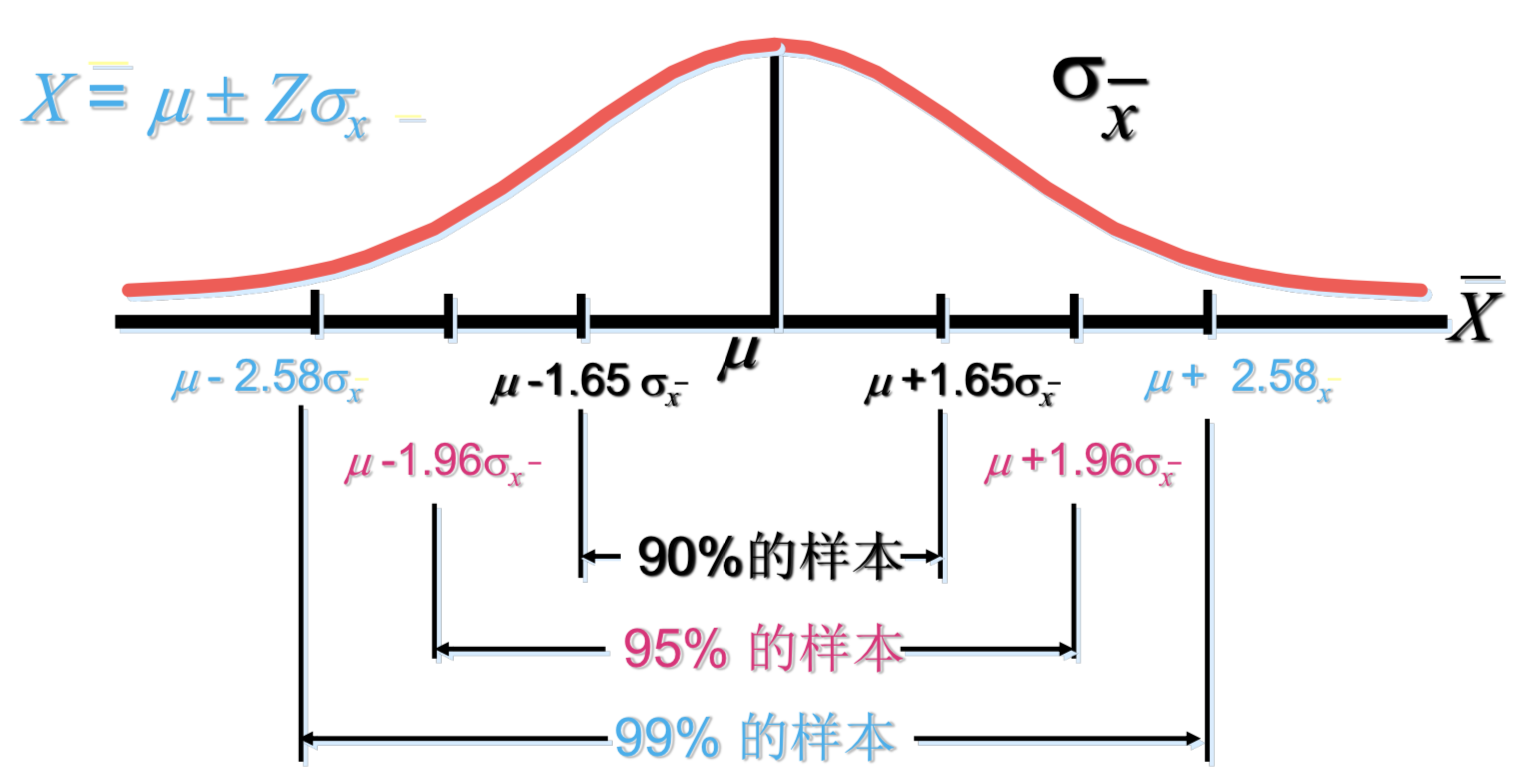

In [27]:
# 进行区间估计
se = stats.sem(house_price_gr.rate)
LB = house_price_gr.rate.mean()  - 1.96*se
UB = house_price_gr.rate.mean()  + 1.96*se
print (LB,UB)

0.10344632517993363 0.11667566822391268


In [28]:
stats.t.interval(0.95, house_price_gr.rate.shape[0]-1, house_price_gr.rate.mean(), stats.sem(house_price_gr.rate))

(0.10339228338892809, 0.11672971001491822)

### 上证指数的收益率

In [9]:
#读取数据
SHindex = pd.read_csv("TRD_Index.csv")
SHindex.head(2)

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2014/1/2,4,2112.126,2113.110,2101.016,2109.387,-0.003115
1,1,2014/1/3,5,2101.542,2102.167,2075.899,2083.136,-0.012445


In [10]:
mu = SHindex.Retindex.mean()
sigma =  SHindex.Retindex.std()
#计算区间
stats.t.interval(0.95,len(SHindex)-1,mu,stats.sem(SHindex.Retindex))

(0.0017279978716816238, 0.0024700651508264178)

# 拟合问题
参考  
Python金融投资分析实践（第12期）lesson05

## 逼近法

In [8]:
import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/plot_img_processing')
from plot_img_ops import plot2D

import numpy as np
import matplotlib.pyplot as plt

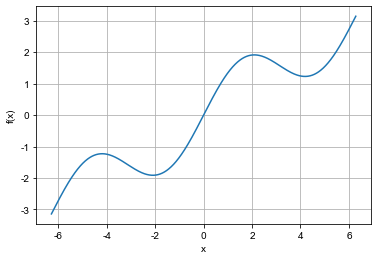

In [2]:
# 示例函数
def f(x):
    return np.sin(x) + 0.5 * x

plot2D(f, (-2 * np.pi, 2 * np.pi))

### 回归问题
确定一组已知的函数组合最优参数，用这个函数组合来拟合一组序列，拟合值越接近目标值，拟合效果越好。

方法：最小二乘法

$$min_{a_1a_2...a_M}\frac{1}{N}\sum^N_{i=1}(y_i-\hat{y_i})^2\\\hat{y_i}=\sum^M_{m=1}a_m*b_m(x_i)$$
其中$b_m(x_i)$是一个已知的函数，如$f(x_1,x_2...)=a_0+a_1x_1+a_2x_2...$, f(x)=sin(x)等

#### 线性回归
$b_m(x_i)$是$f(x_1,x_2...)=a_0+a_1x_1+a_2x_2...$形式，

#### 多项式回归
$b_m(x_i)$是$f(x)=a_0+a_1x+a_2x^2...$形式，

用多项式去拟合函数的原理是泰勒展开

#### python实现
* np.polyfit(np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)  
适用于求解线性回归和多项式回归。其中deg是多项式的阶数
* 用矩阵法  
np.polyfit的限制很明显，拟合函数只能是$f(x)=a_0+a_1x+a_2x^2...$形式，
如果想用$f(x)=a_0+a_1x+a_2sin(x)$来拟合目标序列，就不能使用np.polyfit。  
在这种情况下，就可以使用矩阵法。  
同时，矩阵法还可以解决多元函数的拟合问题！

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

In [5]:
#作为基函数的单项式
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

In [6]:
reg, ry

(array([ 4.28841952e-01, -4.31775426e-17]),
 array([-2.69449345, -2.58451412, -2.4745348 , -2.36455548, -2.25457615,
        -2.14459683, -2.0346175 , -1.92463818, -1.81465885, -1.70467953,
        -1.5947002 , -1.48472088, -1.37474156, -1.26476223, -1.15478291,
        -1.04480358, -0.93482426, -0.82484493, -0.71486561, -0.60488628,
        -0.49490696, -0.38492764, -0.27494831, -0.16496899, -0.05498966,
         0.05498966,  0.16496899,  0.27494831,  0.38492764,  0.49490696,
         0.60488628,  0.71486561,  0.82484493,  0.93482426,  1.04480358,
         1.15478291,  1.26476223,  1.37474156,  1.48472088,  1.5947002 ,
         1.70467953,  1.81465885,  1.92463818,  2.0346175 ,  2.14459683,
         2.25457615,  2.36455548,  2.4745348 ,  2.58451412,  2.69449345]))

Text(0, 0.5, 'f(x)')

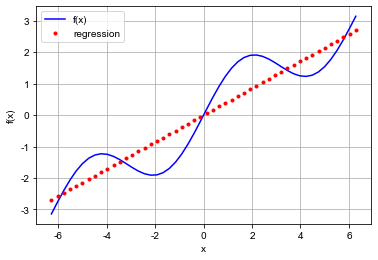

In [9]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

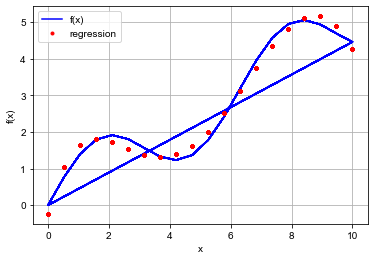

In [26]:
# 多项式的阶数
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

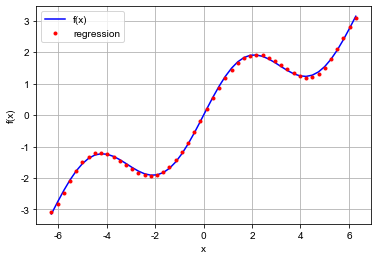

In [13]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)


plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [17]:
# Returns True if two arrays are element-wise equal within a tolerance.
np.allclose(f(x), ry, rtol=1e-05, atol=1e-08)  

False

In [15]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517671

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0, 0.5, 'f(x)')

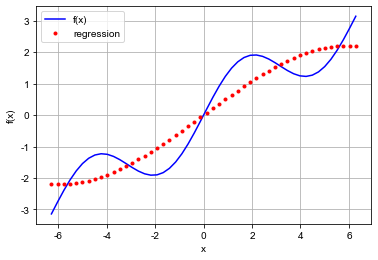

In [18]:
#单独的基函数
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

reg = np.linalg.lstsq(matrix.T, f(x))[0]
reg

ry = np.dot(reg, matrix)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


True

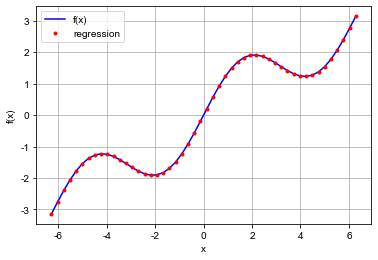

In [19]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

np.allclose(f(x), ry)

Text(0, 0.5, 'f(x)')

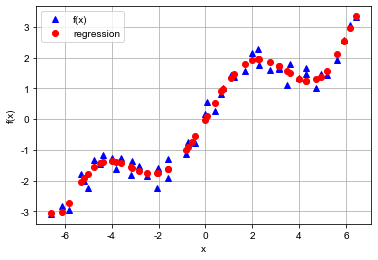

In [20]:
#有噪声的数据
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

[ 3.28  6.1   1.42  3.11  3.87  3.91 -4.02  4.91  1.37 -4.24]
[ 1.5   2.87  1.7   1.59  1.27  1.26 -1.24  1.47  1.66 -1.23]


Text(0, 0.5, 'f(x)')

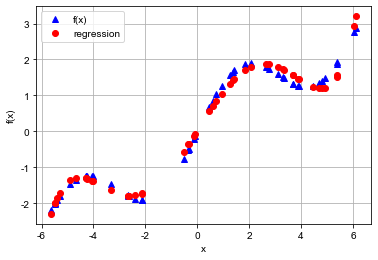

In [21]:
#未排序数据
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

print(xu[:10].round(2))
print(yu[:10].round(2))

reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


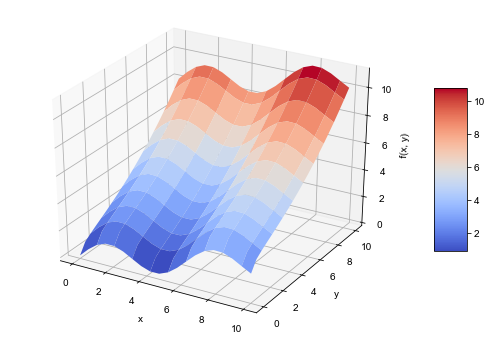

In [22]:
#多维数据
def fm(x,y): #python3不允许元组方式定义输入参数
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
  # generates 2-d grids out of the 1-d arrays
Z = fm(X, Y)
x = X.flatten()
y = Y.flatten()
  # yields 1-d arrays from the 2-d grids

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [23]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

import statsmodels.api as sm

model = sm.OLS(fm(x, y), matrix).fit()

model.rsquared

1.0

In [24]:
a = model.params
a

array([-1.55431223e-15,  2.50000000e-01,  7.68002955e-16, -1.19695920e-16,
        5.00000000e-02,  1.00000000e+00,  1.00000000e+00])

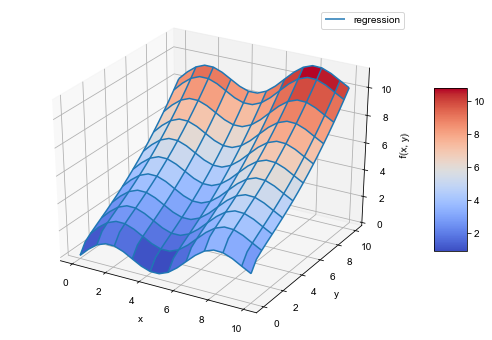

In [25]:
def reg_func(a, x, y):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 +
            f2 + f1 + f0)

RZ = reg_func(a, X, Y)

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

## 插值问题
* 插值问题:  
– 假定区间[a，b]上的实值函数f(x)在该区间上 n+1个互不相同点x0，x1......xn 处的值是f (x0)，......f(xn)，
要求估算f(x)在[a，b]中某点x*的值。 
* 基本思路:  
– 找到一个函数P(x)，在x0，x1......xn 的节点上与f(x)函数值相同(有时，甚至一阶导数值也相同)，用P(x*)的值作 为函数f(x*)的近似。
* 常用方法   
    * 线性插值
    * 多项式插值
    * 样条曲线插值
* 适用场景  
    * 缺失值填补
    * 回归内插预测

Text(0, 0.5, 'f(x)')

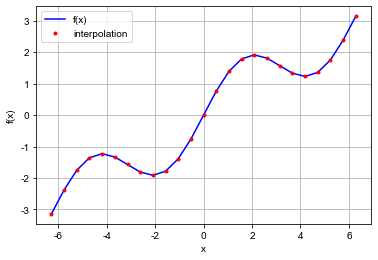

In [27]:
import scipy.interpolate as spi

x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

def f(x):
    return np.sin(x) + 0.5 * x

ipo = spi.splrep(x, f(x), k=1)
iy = spi.splev(x, ipo)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [28]:
np.allclose(f(x), iy)

True

Text(0, 0.5, 'f(x)')

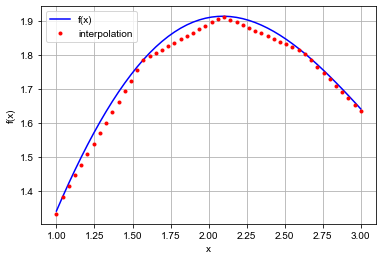

In [29]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

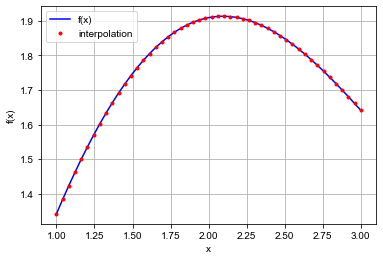

In [30]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [31]:
np.allclose(f(xd), iyd)

False

In [32]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436892e-08

# 凸优化
”凸优化“ 是指一种比较特殊的优化，是指目标函数为凸函数且由约束条件得到的定义 域为凸集的优化问题。
* 适用场景
    * 期权定价模型
    * 效用函数优化
    * 最佳投资组合决策

* 全局优化:众多局部最优解中找到模型的全局最优解
* 局部优化
* 有约束优化

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


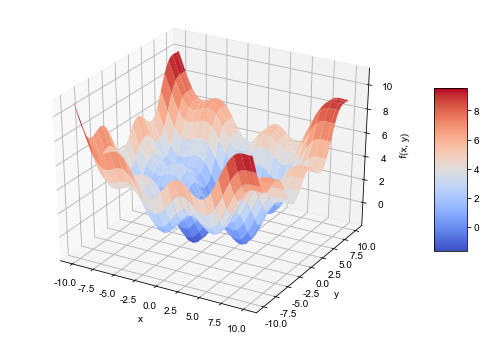

In [33]:
####优化####
def fm(z):
    x,y=z
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.show()

In [34]:
#全局优化
import scipy.optimize as spo

def fo(m):
    x,y=m
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([-1.4, -1.4])

In [35]:
fm(opt1)

-1.7748994599769203

In [36]:
#局部优化
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [37]:
fm(opt2)

-1.7757246992239009

In [38]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

#有约束的优化
from math import sqrt
def Eu(x):
    s,b=x
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# 约束
cons = ({'type': 'ineq', 'fun': lambda x:  100 - x[0] * 10 - x[1] * 10}) #python3的匿名函数，多个输入参数不需要元组形式输入
  # budget constraint
bnds = ((0, 1000), (0, 1000))  # uppper bounds large enough

result = spo.minimize(Eu, [5, 5], method='SLSQP', bounds=bnds, constraints=cons)
result

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

# 积分
## 定积分
$$\int_a^bf(x)dx$$

In [39]:
import scipy.integrate as sci

def f(x):
    return np.sin(x) + 0.5 * x
a = 0.5  # left integral limit
b = 9.5  # right integral limit
x = np.linspace(0, 10)
y = f(x)

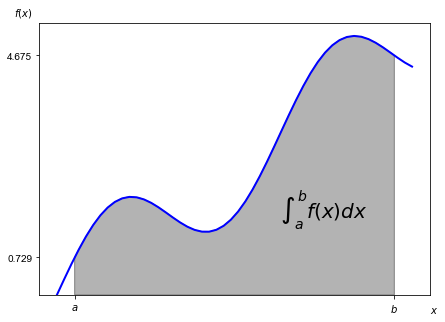

In [40]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

In [41]:
#数组积分
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [42]:
sci.quad(f, a, b)[0]

24.374754718086752

In [43]:
sci.romberg(f, a, b)

24.374754718086713

In [45]:
#通过蒙特卡洛模拟近似积分
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


# 符号计算

In [47]:
# sympy是python标准库，不需要额外安装
import sympy as sy

x = sy.Symbol('x')
y = sy.Symbol('y')

type(x)

sympy.core.symbol.Symbol

In [48]:
sy.sqrt(x)

sqrt(x)

In [49]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [50]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2

In [51]:
sy.simplify(f)

1.5*x**2 + 4.5

In [52]:
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f))
print(sy.pretty(sy.sqrt(x) + 0.5))

     2      
1.5*x  + 4.5
  ___      
\/ x  + 0.5


In [53]:
pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [54]:
pi_str[-40:]

'8245672736856312185020980470362464176199'

In [55]:
pi_str.find('111272')

366713

## 解方程

In [60]:
#求解方程式 x**2-1=0的解
sy.solve(x ** 2 - 1)

[-1, 1]

In [57]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [58]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [59]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

## 积分

In [61]:
a, b = sy.symbols('a b')
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [62]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [63]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

Fb - Fa  # exact value of integral

24.3747547180867

In [64]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [65]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()

sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

24.3747547180867

## 微分

In [66]:
int_func.diff()

0.5*x + sin(x)

In [67]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)

del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [68]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [69]:
xo = sy.nsolve(del_x, -1.5)
xo

-1.42755177876459

In [70]:
yo = sy.nsolve(del_y, -1.5)
yo

-1.42755177876459

In [71]:
f.subs({x : xo, y : yo}).evalf() 

-1.77572565314742

In [72]:
xo = sy.nsolve(del_x, 1.5)
xo

1.74632928225285

In [73]:
yo = sy.nsolve(del_y, 1.5)
yo

1.74632928225285

In [74]:
f.subs({x : xo, y : yo}).evalf()

2.27423381055640